<a href="https://colab.research.google.com/github/ShahakCohen/FruitRecognize/blob/main/Fruits_image_classification_efficentmodel_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import all the Libraries**

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#import commands of libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.layers import Input, Dense, Conv2D, GlobalAveragePooling2D, BatchNormalization, Activation, Dropout

# **Set all the Constants**

In [11]:
BATCH_SIZE =32
IMAGE_SIZE =224
CHANNELS=3 #rgb
EPOCHS=30
classes=9 #numbers of fruits to recognaize

# **Import data into tensorflow dataset object**

In [12]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Fruits_dataset/images",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 360 files belonging to 9 classes.


SO we have total 360 images that belongs to 9 classes

In [13]:
class_names = dataset.class_names
class_names

['apple _fruit',
 'banana_fruit',
 'cherry_fruit',
 'chickoo_fruit',
 'grapes_fruit',
 'kiwi_fruit',
 'mango_fruit',
 'orange_fruit',
 'strawberry_fruit']

In [14]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[5 0 3 6 8 6 8 7 0 3 8 0 8 3 2 4 6 0 5 2 1 1 3 7 5 7 1 6 0 7 8 4]


As you can see above, each element in the dataset is a tuple. First element is a batch of 32 elements of images. Second element is a batch of 32 elements of class labels

# **Visualize some of the images from our dataset**

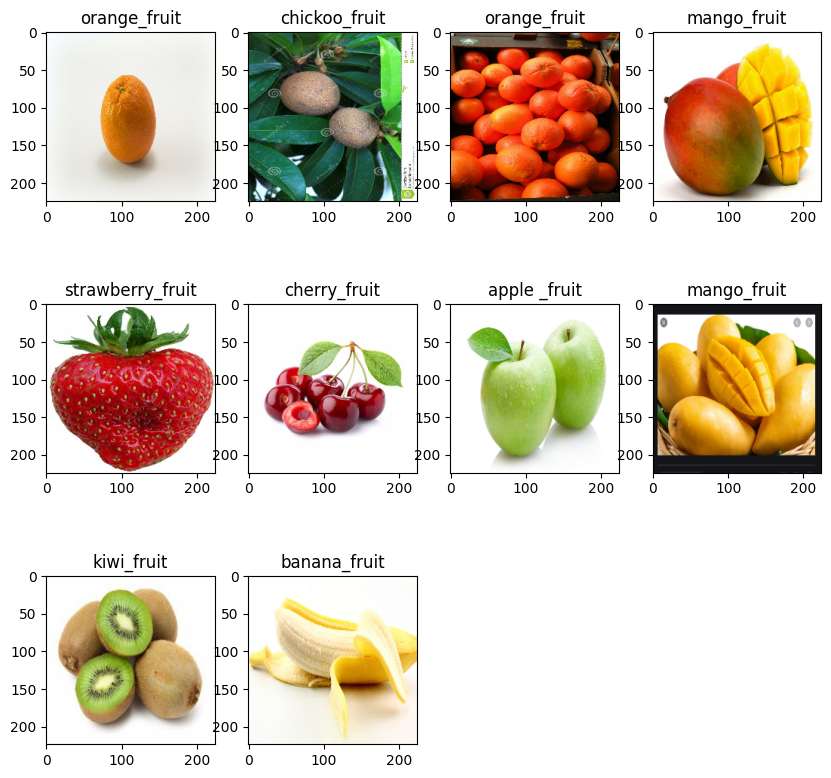

In [15]:
plt.figure(figsize=(10, 10))
for image_batch,label_batch in dataset.take(1):
  for i in range(10):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])

# **Function to Split Dataset**

Dataset should be bifurcated into 2 subsets, namely:

1) Training: Dataset to be used while training


2)Test: Dataset to be tested against after we trained a model

In [ ]:
def get_data_partition(ds,training_size=0.8,test_size=0.2):
  # taking length of dataset
  len_ds=len(ds)

  # taking length of partition
  training=int(len_ds*training_size)
   ## Taking values of partition
  train_ds=ds.take(training) #training
  test_ds=ds.skip(training) #testing

  return train_ds, test_ds

In [ ]:
train_ds, test_ds = get_data_partition(dataset)

In [ ]:
train_ds = train_ds.map(lambda image, label: (image, tf.one_hot(label,classes)))
test_ds = test_ds.map(lambda image, label: (image, tf.one_hot(label,classes)))

# **Model Architecture**

In [ ]:
from tensorflow.keras.applications import EfficientNetB7
base_model = EfficientNetB7(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

for layer in base_model.layers:
    layer.trainable = False  # don't train existing weights

258076736/258076736 [==============================] - 8s 0us/step


In [ ]:
x = GlobalAveragePooling2D()(base_model.output)
outputs = Dense(classes, activation='softmax')(x)  # Output layer
model = tf.keras.models.Model(base_model.input, outputs)

# Compiling the Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history =model.fit(train_ds,
                   epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=test_ds)

Epoch 1/30
9/9 [==============================] - 72s 5s/step - loss: 1.7726 - accuracy: 0.5243 - val_loss: 1.1686 - val_accuracy: 0.7639
Epoch 2/30
9/9 [==============================] - 22s 2s/step - loss: 0.9668 - accuracy: 0.8542 - val_loss: 0.6058 - val_accuracy: 0.9167
Epoch 3/30
9/9 [==============================] - 22s 2s/step - loss: 0.5996 - accuracy: 0.8854 - val_loss: 0.3572 - val_accuracy: 0.9583
Epoch 4/30
9/9 [==============================] - 21s 2s/step - loss: 0.4559 - accuracy: 0.9167 - val_loss: 0.3677 - val_accuracy: 0.9167
Epoch 5/30
9/9 [==============================] - 22s 2s/step - loss: 0.3653 - accuracy: 0.9271 - val_loss: 0.2684 - val_accuracy: 0.9861
Epoch 6/30
9/9 [==============================] - 32s 3s/step - loss: 0.2992 - accuracy: 0.9340 - val_loss: 0.2174 - val_accuracy: 0.9583
Epoch 7/30
9/9 [==============================] - 33s 3s/step - loss: 0.2641 - accuracy: 0.9410 - val_loss: 0.2403 - val_accuracy: 0.9444
Epoch 8/30
9/9 [==================

In [ ]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

loss = history.history['loss']
test_loss = history.history['val_loss']

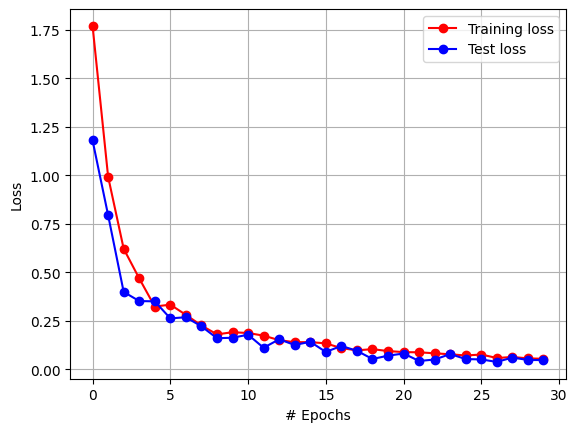

In [ ]:
plt.plot(range(EPOCHS),loss, 'ro-', label="Training loss")
plt.plot(range(EPOCHS),test_loss, 'bo-', label="Test loss")
plt.xlabel("# Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.savefig('Loss vs epochs graph model ARCI_1',format='png')

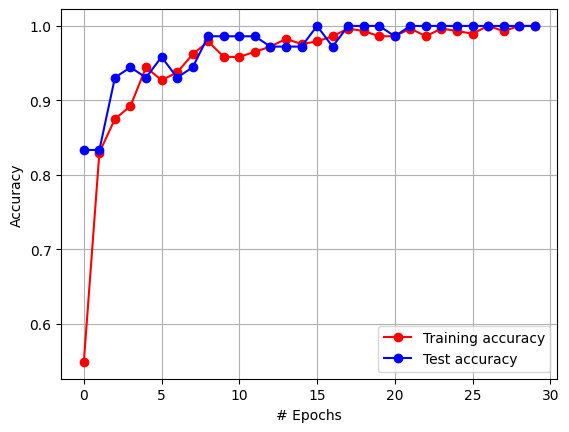

In [ ]:
plt.plot(range(EPOCHS), acc, 'ro-', label="Training accuracy")
plt.plot(range(EPOCHS),test_acc, 'bo-', label="Test accuracy")
plt.xlabel("# Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.savefig('Accuracy vs epochs graph model ARCI_1',format='png')

In [ ]:
# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(test_ds)

# Print the val accuracy and loss
print("val Loss:", val_loss)
print("val Accuracy:", val_accuracy)

3/3 [==============================] - 10s 226ms/step - loss: 0.0488 - accuracy: 1.0000
val Loss: 0.048769764602184296
val Accuracy: 1.0


1/1 [==============================] - 6s 6s/step


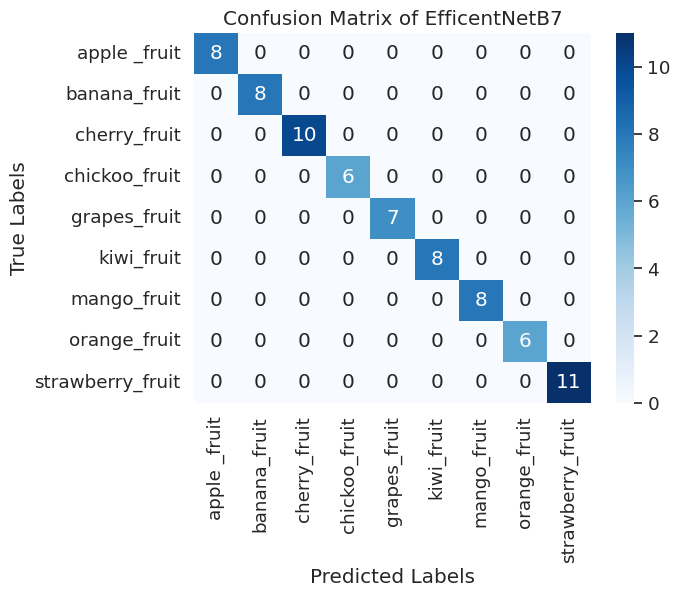

Classification Report of EfficentNetB7:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        11

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Initialize lists to store actual and predicted labels
actual_labels = []
predicted_labels = []

# Iterate over batches in the vtest dataset
for images_batch, labels_batch in test_ds:
    # Extract actual labels
    labels = np.argmax(labels_batch.numpy().astype(int), axis=1)
    actual_labels.extend(labels)

    # Make predictions on the batch
    predictions_batch = model.predict(images_batch)
    # Extract predicted labels
    predicted_labels_batch = np.argmax(predictions_batch, axis=1)
    predicted_labels.extend(predicted_labels_batch)

# Convert the lists to NumPy arrays
actual_labels = np.array(actual_labels)
predicted_labels = np.array(predicted_labels)

# Create confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)


# Create a heatmap with seaborn
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of EfficentNetB7")
plt.show()

# Create classification report
class_report = classification_report(actual_labels, predicted_labels)
print("Classification Report of EfficentNetB7:")
print(class_report)

In [ ]:
model.save('/content/drive/MyDrive/Fruits_dataset/Efficetnet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **NEW IMAGES Prediction system**

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Fruits_dataset/images",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


# Function to predict image class and confidence
def predict(model, img_array):
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    confidence = np.max(prediction) * 100  # confidence in percentage
    return predicted_class[0], confidence


# Function to upload images
def upload_images():
    uploaded = files.upload()
    image_list = []
    for file_name in uploaded.keys():
        img = image.load_img(file_name, target_size=(224, 224))  # adjust target_size as per your model's input size
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # model expects 4D input
        image_list.append((file_name, img_array))
    return image_list



loaded_model= load_model('/content/drive/MyDrive/Efficetnet_model.h5')

# Upload images
uploaded_images = upload_images()

# Display images with predictions
plt.figure(figsize=(12, 12))
for i, (file_name, img_array) in enumerate(uploaded_images):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    img = image.array_to_img(img_array[0])
    plt.imshow(img)

    predicted_class, confidence = predict(loaded_model, img_array)
    class_names=dataset.class_names  # Replace with your actual class names
    plt.title(f"Predicted: {class_names[predicted_class]},\nConfidence: {confidence:.2f}%")
    plt.axis("off")

plt.tight_layout()
plt.show()
